# Week 01
## Setup

In [30]:
library("rethinking");

 ## Exercise 1
Globe tossing turned out to be 8 water in 15 tosses.
Construct the posterior distribution, using grid approximation.
Use a flat prior.

In [35]:
# define grid
p_grid <- seq(from=0, to=1, length.out=20)

# define prior
prior <- rep(1, 20)

# compute likelihood at each value in grid
likelihood <- dbinom(8, size=15, prob=p_grid)

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)
sum(posterior*p_grid)

[1] 0.5294118

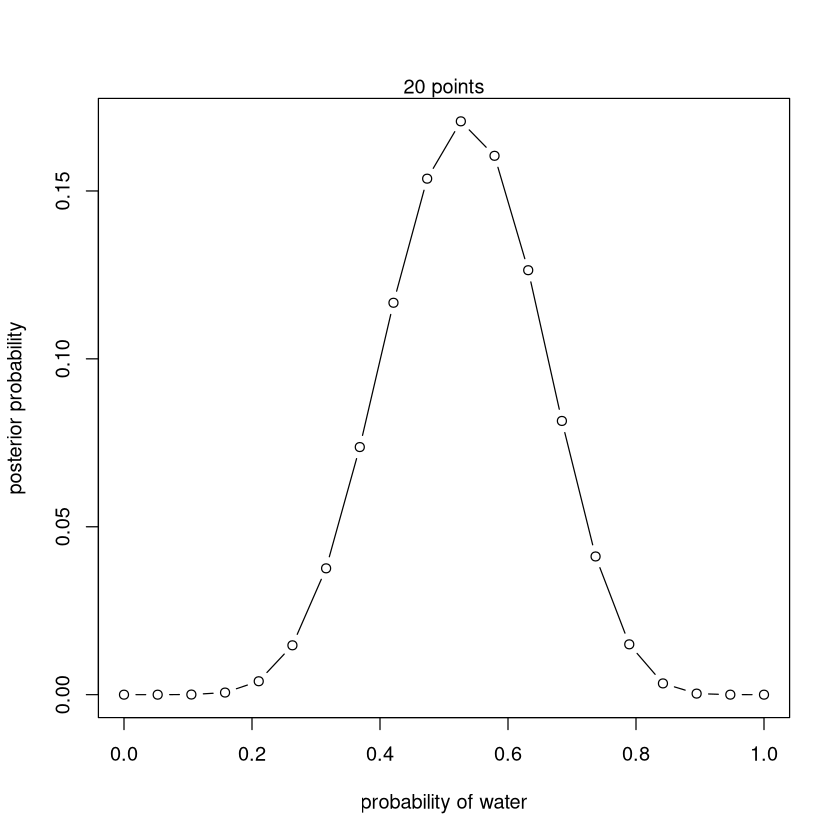

In [3]:
plot(p_grid, posterior, type="b", xlab="probability of water", ylab="posterior probability")
mtext("20 points")

## Exercise 2
Prior with zero below $p = 0.5$ and a constant above $p = 0.5$.

In [4]:
# define new prior
prior <- ifelse(p_grid < 0.5, 0, 1)*2

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)
sum(p_grid*posterior)

[1] 0.6071397

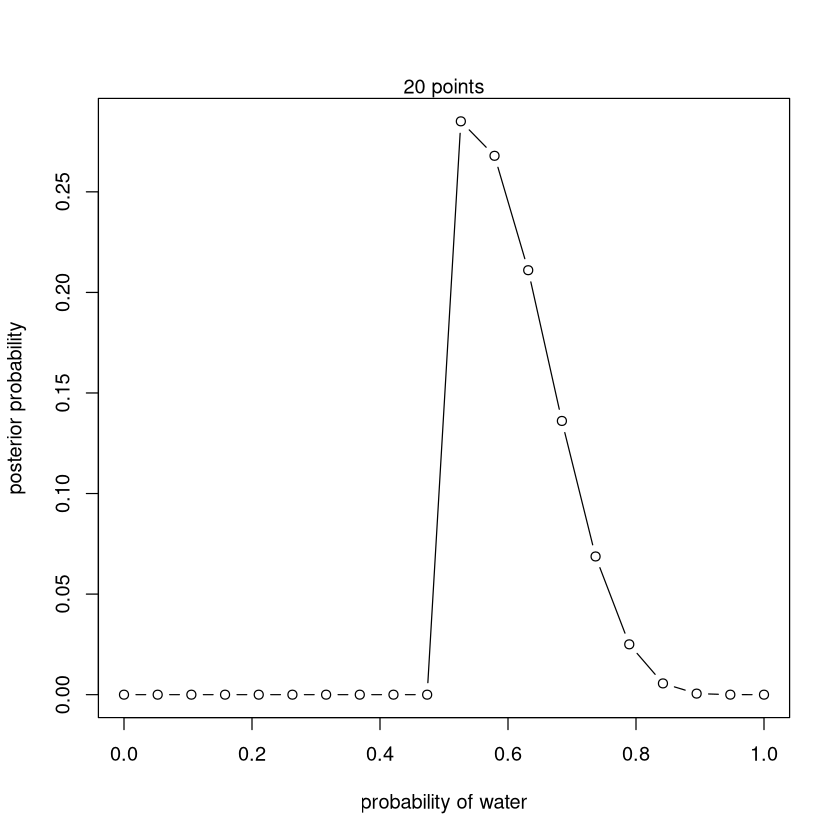

In [5]:
plot(p_grid, posterior, type="b", xlab="probability of water", ylab="posterior probability")
mtext("20 points")

## Exercise 3
Estimate the Earth's proportion very precisely.
How many times will you have to toss the globe to make the $99\%$ percentile interval of the posterior distribution of $p$ to be only $0.05$ wide.

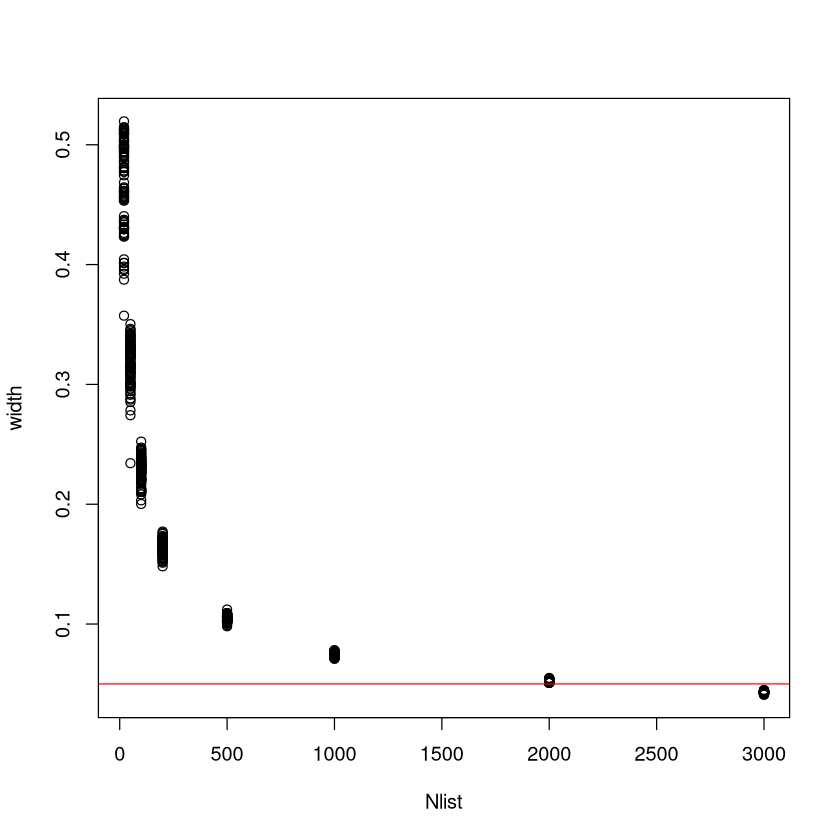

In [29]:
f <- function(N) {
    p_true <- 0.7
    W <- rbinom(1, size=N, prob=p_true)
    # define grid
    p_grid <- seq(from=0, to=1, length.out=1000)

    # define prior
    prior <- rep(1, 1000)
    
    # compute likelihood at each value in grid
    likelihood <- dbinom(W, size=N, prob=p_grid)

    # compute product of likelihood and prior
    unstd.posterior <- likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior <- unstd.posterior / sum(unstd.posterior)
   
    samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
    PI99 <- PI(samples, prob=0.99)
    as.numeric(PI99[2] - PI99[1])
}

Nlist <- c(20, 50, 100, 200, 500, 1000, 2000, 3000)
Nlist <- rep(Nlist, each=100)
width <- sapply(Nlist, f)
plot(Nlist, width)
abline(h=0.05, col="red")